In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


Get the dataset from this link -> https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

In [2]:
#load the dataset
orig_data = pd.read_csv("smoking_driking_dataset_Ver01.csv")
print(orig_data.head())

    sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   
2  Male   40     165      75       91.0         1.2          1.5        1.0   
3  Male   50     175      80       91.0         1.5          1.2        1.0   
4  Male   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_AL

In [3]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [4]:
# collect the categorical columns using list comprehension.
categorical_columns = [column for column in orig_data.columns if orig_data[column].dtype == 'object']
print(categorical_columns)

['sex', 'DRK_YN']


In [5]:
# create dictionaries to map the categorical values to numerical values
index_dictionary = dict()
inv_index_dictionary = dict()
for col in categorical_columns:
    unique_values = orig_data[col].unique()
    idx_dict = {val: idx for idx, val in enumerate(unique_values)}        # This dictionary takes the string value and returns a number
    inv_idx_dict = {idx: val for idx, val in enumerate(unique_values)}    # This dictionary takes a number and returns a string value
    # convert the values of the column to number in the dataframe
    orig_data[col] = orig_data[col].map(idx_dict)
    # Store the dictionaries
    index_dictionary[col] = idx_dict
    inv_index_dictionary[col] = inv_idx_dict

In [6]:
print(index_dictionary)
print(inv_index_dictionary)

{'sex': {'Male': 0, 'Female': 1}, 'DRK_YN': {'Y': 0, 'N': 1}}
{'sex': {0: 'Male', 1: 'Female'}, 'DRK_YN': {0: 'Y', 1: 'N'}}


In [7]:
orig_data.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,0
1,0,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,1
2,0,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,1
3,0,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,1
4,0,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,1


In [8]:
y_col = 'SMK_stat_type_cd'

df_y = orig_data[[y_col]]
X_cols = list(orig_data.columns)
X_cols.remove(y_col)
df_X = orig_data[X_cols]
df_X.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN
0,0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,0
1,0,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,1
2,0,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1
3,0,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1
4,0,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1


In [9]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

In [10]:
# Verify the data is correct
train_X.head(2)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN
751370,1,55,155,60,93.0,0.7,0.9,1.0,1.0,110.0,...,52.0,115.0,90.0,13.2,1.0,1.0,34.0,62.0,51.0,1
823097,1,65,150,55,82.0,0.8,0.7,1.0,1.0,130.0,...,51.0,108.0,101.0,11.6,1.0,0.8,28.0,19.0,18.0,1


In [11]:
# Verify the data is correct
train_y.head(2)

,SMK_stat_type_cd
751370,2.0
823097,1.0


# Creating a smoker classifier to identify the smoking status of the people
# Smoking status: 1(never), 2(used to smoke but quit), 3(still smoke)

/Users/hytung/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hytung/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hytung/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


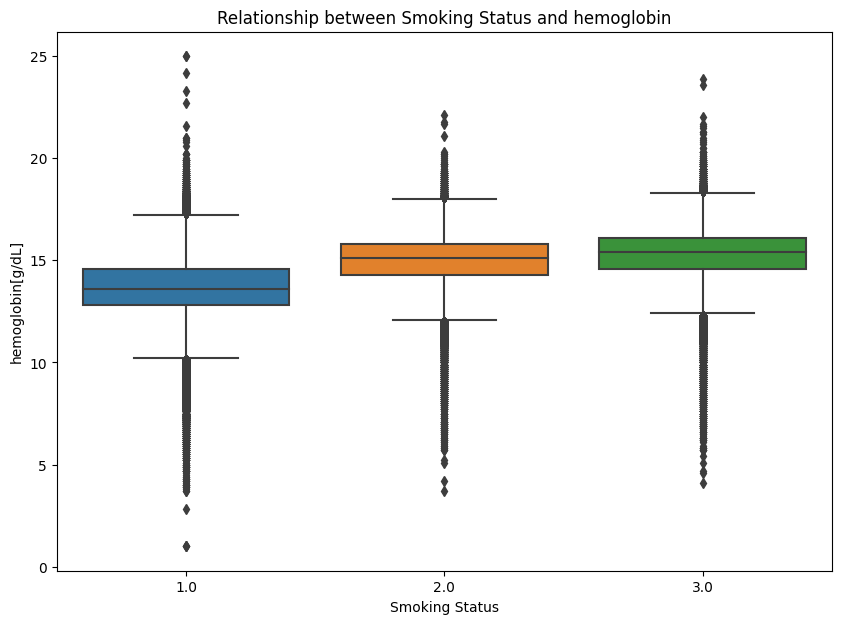

In [12]:
plt.rcParams['figure.figsize'] = [10, 7]

sns.boxplot(x='SMK_stat_type_cd', y='hemoglobin', data=orig_data[['SMK_stat_type_cd', 'hemoglobin']])

# Set labels and title
plt.xlabel('Smoking Status')
plt.ylabel('hemoglobin[g/dL]')
plt.title('Relationship between Smoking Status and hemoglobin')

# Show the plot
plt.show()

/Users/hytung/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hytung/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hytung/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


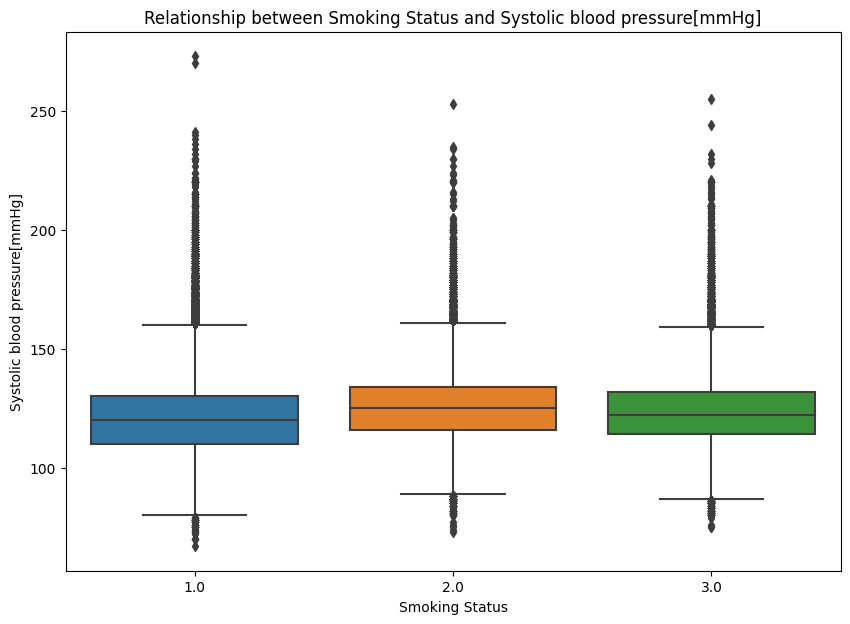

In [13]:
plt.rcParams['figure.figsize'] = [10, 7]

sns.boxplot(x='SMK_stat_type_cd', y='SBP', data=orig_data[['SMK_stat_type_cd', 'SBP']])

# Set labels and title
plt.xlabel('Smoking Status')
plt.ylabel('Systolic blood pressure[mmHg]')
plt.title('Relationship between Smoking Status and Systolic blood pressure[mmHg]')

# Show the plot
plt.show()

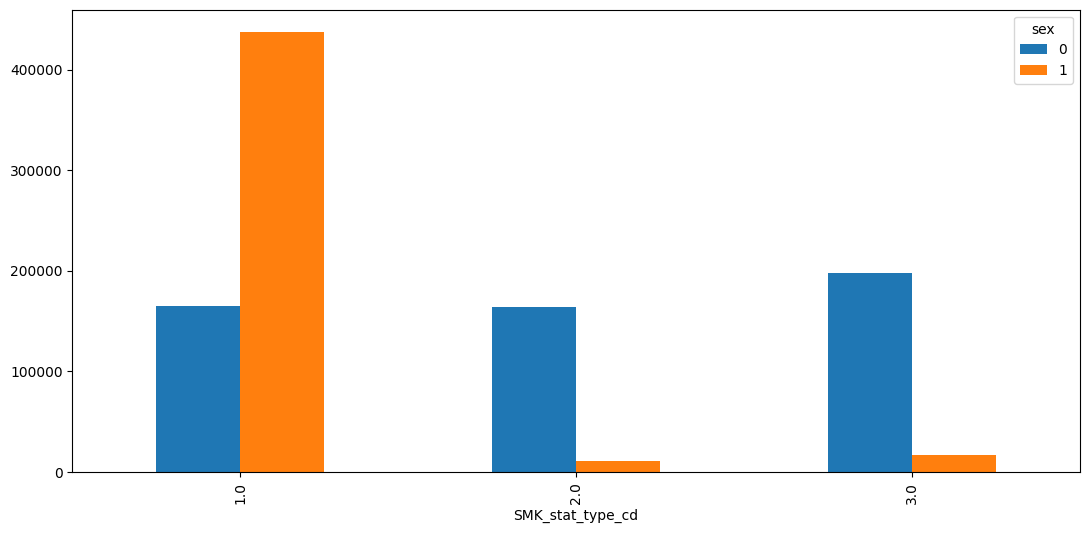

In [14]:
# Group the data by 'sex' and 'Smoking state' and count the number of people in each category
counts = orig_data.groupby(['SMK_stat_type_cd', 'sex']).size().unstack().plot(kind='bar', figsize=(13, 6))


From the 2 boxplots, the average of Class 2 and 3 is slightly higher than Class 1. 

The bar chart shows that there are few females in Class 2 and 3 while males are almost equally-distributed in all the classes.

# Supervised model - Random Forest (Higher accuracy compared to other models)
Since the difference of the 3 classes is very small (especially Class 2 and Class 3), a high accuracy model is prefered to differentiate the relationship of the classes.

In [20]:
# train a model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dtree = DecisionTreeClassifier(max_depth=7)
dtree.fit(train_X, train_y)

# get predictions with the fitted model
dtree_preds = dtree.predict(test_X)
report = classification_report(test_y, dtree_preds)
print(report)

              precision    recall  f1-score   support

         1.0       0.82      0.85      0.84    180879
         2.0       0.45      0.31      0.36     52511
         3.0       0.49      0.57      0.53     64014

    accuracy                           0.69    297404
   macro avg       0.59      0.58      0.58    297404
weighted avg       0.69      0.69      0.69    297404



In [21]:
# train a model
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=10)
rf_classifier.fit(train_X, train_y)

# get predictions with the fitted model
predictions = rf_classifier.predict(test_X)
report = classification_report(test_y, predictions)
print(report)

/Users/hytung/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

         1.0       0.80      0.85      0.82    180879
         2.0       0.39      0.35      0.37     52511
         3.0       0.50      0.45      0.47     64014

    accuracy                           0.68    297404
   macro avg       0.56      0.55      0.55    297404
weighted avg       0.66      0.68      0.67    297404

